In [1]:
!pip install pycaret[full]

In [2]:
from google.colab import files
uploaded = files.upload()


Saving dataset-of-00s.csv to dataset-of-00s.csv
Saving dataset-of-10s.csv to dataset-of-10s.csv
Saving dataset-of-60s.csv to dataset-of-60s.csv
Saving dataset-of-70s.csv to dataset-of-70s.csv
Saving dataset-of-80s.csv to dataset-of-80s.csv
Saving dataset-of-90s.csv to dataset-of-90s.csv


In [3]:
import pandas as pd
from pycaret.classification import *

# List of all uploaded CSV files
csv_files = [
    'dataset-of-00s.csv',
    'dataset-of-10s.csv',
    'dataset-of-60s.csv',
    'dataset-of-70s.csv',
    'dataset-of-80s.csv',
    'dataset-of-90s.csv'
]

# Merge into one DataFrame
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

In [4]:
print(df.columns)
print(df['target'].value_counts())  # Target should be 1 = hit, 0 = not hit


Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')
target
1    20553
0    20553
Name: count, dtype: int64


In [5]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [14]:
# Drop these metadata/ID columns before setup
drop_cols = ['track', 'artist', 'uri', 'release_date']

df_clean = df.drop(columns=drop_cols, errors='ignore')

# Optional: Check available features after dropping
print(df_clean.columns)

# Re-run PyCaret setup
clf = setup(
    data=df_clean,
    target='target',

)


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target'],
      dtype='object')


,Description,Value
0,Session id,2437
1,Target,target
2,Target type,Binary
3,Original data shape,"(41106, 16)"
4,Transformed data shape,"(41106, 16)"
5,Transformed train set shape,"(28774, 16)"
6,Transformed test set shape,"(12332, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [15]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7856,0.8678,0.8433,0.7562,0.7973,0.5712,0.5751,17.5000
et,Extra Trees Classifier,0.7838,0.8614,0.8450,0.7529,0.7963,0.5675,0.5719,3.6620
rf,Random Forest Classifier,0.7837,0.8621,0.8313,0.7591,0.7935,0.5674,0.5700,8.3020
lightgbm,Light Gradient Boosting Machine,0.7832,0.8628,0.8437,0.7526,0.7956,0.5663,0.5706,1.5680
xgboost,Extreme Gradient Boosting,0.7779,0.8573,0.8303,0.7516,0.7890,0.5559,0.5590,0.6410
gbc,Gradient Boosting Classifier,0.7729,0.8528,0.8457,0.7383,0.7883,0.5458,0.5518,9.2540
ada,Ada Boost Classifier,0.7550,0.8335,0.8200,0.7258,0.7700,0.5100,0.5145,1.8650
qda,Quadratic Discriminant Analysis,0.7248,0.8112,0.9007,0.6664,0.7660,0.4496,0.4805,0.0740
ridge,Ridge Classifier,0.7220,0.7992,0.8437,0.6786,0.7522,0.4441,0.4579,0.0910
lda,Linear Discriminant Analysis,0.7219,0.7992,0.8434,0.6785,0.7520,0.4437,0.4575,0.0850


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [16]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
final_model = finalize_model(best)
predictions = predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8419,0.9238,0.8957,0.8086,0.8500,0.6837,0.6877


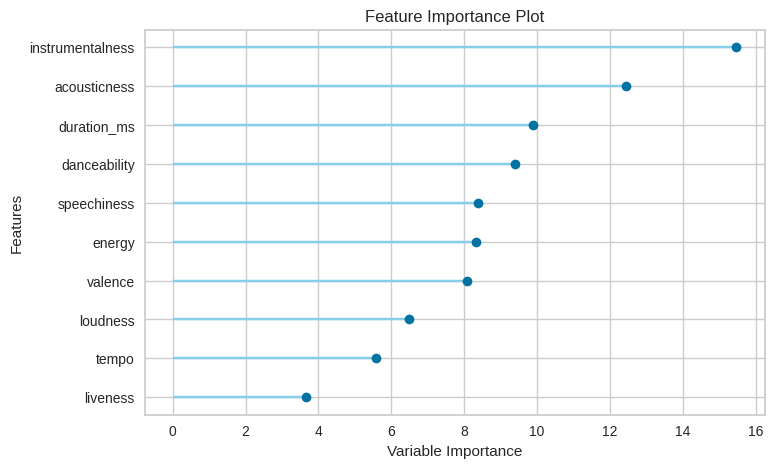

In [18]:
plot_model(final_model, plot='feature')

In [20]:
save_model(final_model, 'spotify_hit_predictor_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['danceability', 'energy', 'key',
                                              'loudness', 'mode', 'speechiness',
                                              'acousticness', 'instrumentalness',
                                              'liveness', 'valence', 'tempo',
                                              'duration_ms', 'time_signature',
                                              'chorus_hit', 'sections'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_v...
                                                               keep_empty_features=False,
                                                               missing_values

In [21]:
from google.colab import files
files.download('spotify_hit_predictor_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>